# NAMA : Ni komang Tri Lestari

# NIM  : 09011381722127

# KELAS : SK5U

# BREAST CANCER DIAGNOSIS USING ANN

# Referensi 

Paper: Breast Cancer Diagnosis Using ANN

Dataset: https://www.kaggle.com/sandeep3031/breast-cancer-diagnosis-using-ann

kanker payudara adalah suatu kanker yang terbentuk di sel-sel payudara. lebih dari 150 ribu per tahun(indonesia) terkena kanker payudara. kanker payudara dapat ditangani oleh tenaga medis profesional, membutuhkan diagnosis medis dan selalu memerlukan uji  laboratorium. 

Dataset ini merupakan data dari rumah sakit yang memberitahukan berapa banyak orang yang di diagnosis kanker payudara yang ganas maupun jinak.

# Import Library

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

 pertama-tama yang kita lakukan adalah mengimport library yang akan digunakan:
1. Library pandas
    berfungsi untuk membaca file dataset dalam bentuk. CVS
    
2. Library Numpy 
   berfungsi untuk mengolah data dalam bentuk angka (array)
  
3. Library sklearn.model_selection

4. library sklearn.preprocessing

5. Library Matplotlib 
   berfungsi untuk membantu visualisasi dataset sehingga memudahkan untuk dipahami
    
6. library warnings
  

# Reading Data

In [2]:
data=pd.read_csv("breast-cancer-wisconsin-data.csv")

#  Uderstanding Data

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Pada data diatas dapat di lihat bahwa diagnosis dilambangkan dengan M dimana M adalah ganas dan jika B adalah jinak.
diatas itu adalah M, jadi data diagnosis kanker payudara adalah ganas.

# Deleting unwanted colums

In [4]:
drop_cols=["id","Unnamed: 32"]
data.drop(drop_cols,axis=1,inplace=True)

In [5]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# Checking The Null values

Setelah saya mengimport dataset, saya melakukan pegecekaan terhadap dataset saya, apakah data tersebut sudah bersih atau masih ada data kosong.

In [6]:
data.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

#  Converting M to 1 and B to 0 

In [7]:
data['diagnosis']=[1 if x=='M' else 0 for x in data['diagnosis']]

In [8]:
data.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

Jadi hasilnya adalah diagnosis kanker payudara B(jinak)= 0 berjumlah 357 dan M(ganas)= 1 berjumlah 212.

# Separating the dependent and independent features

In [9]:
y=data.diagnosis
X=data
X.drop("diagnosis",axis=1,inplace=True)

In [10]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


variabel independen(variabel Bebas) adalah variabel yang mempengaruhi atau sebab perubahan timbulnya variabel terikat yaitu dependen.  pada data diatas terdapat beberapa variabel bebas dan tidak bebas, diantaranya adalah sebagai berikut:
1. rata-rata radius berjumlah (17.99) (20.57) (19.69) (1.42) (20.29)
2. rata-rata tekstur berjumlah (10.38) (17.77) (21.25) (20.38) (14.34)
3. rata-rata perimeter berjumlah (122.80( (132.90) (130.00) (77.58) (135.10)
4. rata-rata area berjumlah (1001.0) (1326.0) (1203.0) (386.1) (1297.0)
5. rata-rata kehalusan berjumlah (0.11840) (0.08474) (0.10960) (0.14250) (0.10030)
6. rata-rata kekompakan berjumlah (0.27760) (0.07864) (0.15990) (0.28390) (0.132800)
7. rata-rata konkavitas berjumlah (0.3001) (0.0869) (0.1974) (0.2414) (0.1980)
8. rata-rata titik cekung berjumlah (0.14710) (0.07017) (0.12790) (0.10520) (0.10430)
9. rata-rata simetri berjumlah (0.2419) (0.1812) (0.2069) (0.2597) (0.1809)
10. rata-rata dimensi fraktal berjumlah (0.07871) (0.05667) (0.05999) (0.09744) (0.05883)
11. radius terburuk berjumlah (25.38) (24.99) (23.57) (14.91) (22.54)
12. tekstur terburuk berjumlah (17.33) (23.41) (25.53) (26.50) (16.67)
13. premeter terburuk berjumlah (184.60) (158.80) (152.50) (98.87) (152.20)
14. daerah yang lebih buruk berjumlah (2019.0) (1956.0) (1709.0) (567.7) (1575.0)
15. kelancaran terburuk berjumlah (0.1622) (0.1238) (0.1444) (0.2098) (0.1374)
16. kekompakan terburuk berjumlah (0.6656) (0.1866) (0.4245) (0.8663) (0.2050)
17. cekung terburuk berjumlah (0.7119) (0.2416) (0.4504) (0.6869) (0.4000)      
18. cat cekung terburuk berjumlah (0.2654) (0.1860) (0.2430) (0.2575) (0.1625)
19. simetri terburuk berjumlah (0.4601) (0.2750) (0.3613) (0.6638) (0.2364)
20. dimensi fraktal terburuk berjumlah (0.11890) (0.08902) (0.08758) (0.17300) (0.07678)


# Spliting and modelling

In [11]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=123)
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(398, 30)
(171, 30)
(398,)
(171,)


1. jadi pada train_X.shape jumlahnya 398 dan 30
2. pada test_X.shape jumlahnya adalah 171 dan 30
3. train_y.shape jumlahnya 398
4. test_y.shape jumlahnya 171.

# Standardizing the data

In [12]:
std=StandardScaler()
std.fit(train_X)
train_X=pd.DataFrame(std.transform(train_X),index=train_X.index)
test_X=pd.DataFrame(std.transform(test_X),index=test_X.index)

In [13]:
train_X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
559,-0.754501,1.016591,-0.731287,-0.732655,-0.244628,-0.046204,0.276113,-0.209613,-1.463648,0.393141,...,-0.786560,1.835601,-0.748038,-0.715894,-0.048296,0.013325,0.464941,-0.272555,-1.224122,0.246375
295,-0.107318,-1.377551,-0.167357,-0.212302,-0.290236,-0.806690,-0.982285,-0.780715,-0.758709,-0.498156,...,-0.330400,-1.399872,-0.391399,-0.384622,-0.624296,-0.968536,-1.127291,-0.871529,-0.081993,-0.899752
264,0.872048,0.598852,0.813064,0.791235,0.092006,-0.277838,0.018477,0.422567,0.191577,-0.947868,...,1.108900,0.583315,0.998261,0.988855,1.121705,0.047299,0.591565,1.311903,0.549310,-0.440828
125,-0.084408,-0.492662,-0.151531,-0.194880,-0.589225,-0.822895,-0.937614,-0.983264,-0.682686,-0.527956,...,-0.159600,-0.336308,-0.207531,-0.269767,-0.682796,-0.779638,-0.913008,-0.980094,-0.819317,-0.670290
280,1.436186,1.616250,1.421142,1.400153,0.435156,0.777386,1.288387,1.241373,0.312522,-0.080953,...,1.554646,1.634084,1.577161,1.499322,2.129706,0.912967,1.503354,1.137701,0.616777,0.830675


# Importing the keras and other libraries 

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers,optimizers
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

Using TensorFlow backend.


In [15]:
adam=keras.optimizers.adam(lr=0.001,decay=0.0005)
model=Sequential()
model.add(Dense(16,input_shape=(30,)))
model.add(Dense(8,init="uniform",activation="relu"))
model.add(Dense(4,init="uniform",activation="relu"))
model.add(Dense(1,activation="sigmoid",kernel_regularizer=regularizers.l2()))

Ditambahkan lapisan lain ke model ini karena menerapkan Deep Learning, yang merupakan jaringan saraf tiruan dengan banyak lapisan.

Relu melakukan trshold dari 0 hingga infinity, Relu juga dapat menutupi kelemahan yang dimiliki oleh sigmoid dan Tanh. 


In [16]:
## Callbacks
earlystopper = EarlyStopping(monitor='val_loss', patience=10)
reduce_lr = ReduceLROnPlateau(patience=5, verbose=1)

In [17]:
#compiling our model and defining the loss function
model.compile(optimizer=adam,loss="binary_crossentropy",metrics=["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# Training

In [18]:
#training the neural nets
history=model.fit(train_X,train_y,validation_data=(test_X,test_y),epochs=50,batch_size=16,callbacks=[earlystopper,reduce_lr])


Train on 398 samples, validate on 171 samples
Epoch 1/50
398/398 [==============================] - 1s 3ms/step - loss: 0.7060 - accuracy: 0.6005 - val_loss: 0.7043 - val_accuracy: 0.6023
Epoch 2/50
398/398 [==============================] - 0s 423us/step - loss: 0.6982 - accuracy: 0.6583 - val_loss: 0.6879 - val_accuracy: 0.7018
Epoch 3/50
398/398 [==============================] - 0s 259us/step - loss: 0.6642 - accuracy: 0.8417 - val_loss: 0.6210 - val_accuracy: 0.9415
Epoch 4/50
398/398 [==============================] - 0s 247us/step - loss: 0.5565 - accuracy: 0.9196 - val_loss: 0.4444 - val_accuracy: 0.9649
Epoch 5/50
398/398 [==============================] - 0s 302us/step - loss: 0.3706 - accuracy: 0.9246 - val_loss: 0.2561 - val_accuracy: 0.9649
Epoch 6/50
398/398 [==============================] - 0s 251us/step - loss: 0.2375 - accuracy: 0.9246 - val_loss: 0.1680 - val_accuracy: 0.9766
Epoch 7/50
398/398 [==============================] - 0s 318us/step - loss: 0.1775 - accura

In [20]:
Hasil =model.evaluate (train_X, train_y)
print("\n%s:%.2f%%" % (model.metrics_names[1], Hasil[1]*100))

398/398 [==============================] - 0s 40us/step

accuracy:98.49%


Jadi akurasinya adalah 98.49%

# Ploting model accuracy and loss accuracy

In [21]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

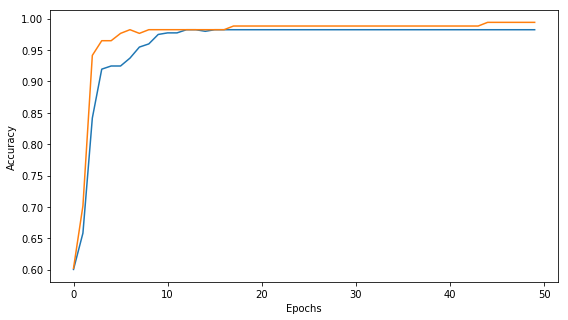

In [22]:
from matplotlib import pyplot as plt  
%matplotlib inline 
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(train_acc)
plt.plot(val_acc)

grafik diatas merupakan accurcy dengan Epochs 50.

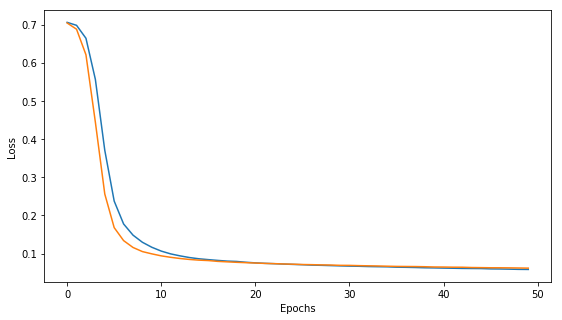

In [23]:
from matplotlib import pyplot as plt 
%matplotlib inline 
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(train_loss)
plt.plot(val_loss)

grafik diatas merupakan loss dengan epochs 50

# Using Sklearn MLP Classifier With Grid Search

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

classifier=MLPClassifier(activation="logistic",random_state=123)

param= {"batch_size" : [16, 32, 64, 128],
           "hidden_layer_sizes" : [(11,), (15,), (19,),(21,)],
           "max_iter" : [50, 100, 150, 200]}

grid=GridSearchCV(estimator=classifier,param_grid=param,cv=5,n_jobs=1)
grid.fit(train_X,train_y)
grid.best_estimator_

MLPClassifier(activation='logistic', alpha=0.0001, batch_size=32, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(11,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=50, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=123,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

# Train and Test Acuracy

In [25]:
train_preds=grid.best_estimator_.predict(train_X)
test_preds=grid.best_estimator_.predict(test_X)

In [26]:
from sklearn.metrics import accuracy_score
print("Train Accuracy  :  ",accuracy_score(train_y,train_preds))
print("Test Accuracy   :  ",accuracy_score(test_y,test_preds))

Train Accuracy  :   0.9824120603015075
Test Accuracy   :   0.9883040935672515


dataset yang digunakan adalah train dan test. maka dengan itu saya disini mencari jumlah accuracynya :
    1. train accuracy adalah 0.9824 atau 98.24%
    2. test accuracy adalah 0.9883 atau 98.83%

# Matriks Confusion

Confusion matrix merupakan salah satu metode yang dapat digunakan untuk mengukur kinerja suatu metode klasifikasi. Pada dasarnya confusion matrix mengandung informasi yang membandingkan hasil klasifikasi yang dilakukan oleh sistem dengan hasil klasifikasi yang seharusnya.

Pada pengukuran kinerja menggunakan confusion matrix, terdapat 4 (empat) istilah sebagai representasi hasil proses klasifikasi. Keempat istilah tersebut adalah:

1) True Positive (TP) merupakan data positif yang terdeteksi benar.

2) True Negative (TN) merupakan jumlah data negatif yang terdeteksi dengan benar

3) False Positive (FP) merupakan data negatif namun terdeteksi sebagai data positif

4) False Negative (FN) False Negative (FN) merupakan kebalikan dari True Positive, sehingga data posifit, namun terdeteksi sebagai data negatif.


In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
y_pred=model.predict(x_test)
y_pred=(y_pred>0.5)

In [38]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test, y_pred)

In [39]:
cm

array([[  0, 108],
       [  0,  63]], dtype=int64)

Hasil perolehan nilai Accuracy, Specificity, Sensitivity, Precision, dan F1 Score pada data training

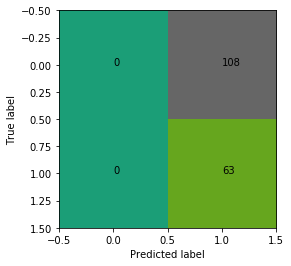

In [40]:
plt.clf()
plt.imshow(cm,cmap=plt.cm.Dark2)
classNames = ['Negative', 'Positive']
plt.ylabel('True label')
plt.xlabel('Predicted label')
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(cm[i][j]))
plt.show()

gambar diatas adalah matriks yang dihasilkan. yaitu : [0, 108] & [0, 63]

In [41]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       108
          1       0.37      1.00      0.54        63

avg / total       0.14      0.37      0.20       171



jadi total nya adalah :
    1. precision 0.14
    2. recall 0.37
    3. f1-score 0.20
    4. support 171